In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import time

In [15]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_data = pd.read_csv('Train25.csv')
#train_data = pd.read_csv('train_data.csv')

print("--- %s seconds ---" % (time.time() - start_time))
train_data

--- 51.19292116165161 seconds ---


Unnamed: 0                                        customer_ID  \
0           4580744  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
1           1129269  3423938309c0311e273f994fb75c17c051248bec00b142...   
2            786878  24830d3e3a6739380c1e4f410cdbc1cccd8670ca4efac5...   
3            417099  136e58c0698fa15569bbb189ed3f67d4d0773eb1f40475...   
4           2559303  7613e081c2fa384bfb6b1df0bab37a0ef29a27cccf5e83...   
...             ...                                                ...   
1382857     1976281  5b3ced2cebbe1d518a3a6645fe165577cdaa210e61579a...   
1382858     3251323  96380ff3221345f0c80f61597c355958598646b3e024f7...   
1382859     3589440  a5d08297343d1c9a6cc82eff919d41ffa5179e95fbb38d...   
1382860     1929743  590d8d936b5e7ff008f53b3a34a23e0b26c46c5604f5fa...   
1382861     5242852  f27d91300d856f1addb44416f1940277bf3fb2e4fa381e...   

                S_2       P_2      D_39       B_1       B_2       R_1  \
0        2018-03-17  0.927437  0.007716  0.002012  0.811036  0.001816   
1        2018-02-27  0.692903  0.007248  0.008110  0.813047  0.001296   
2        2017-10-25  0.760664  0.007164  0.003502  0.816307  0.008692   
3        2017-07-14  0.541180  0.006883  0.592058  0.043188  0.005739   
4        2017-11-17  0.368668  0.031484  0.453274  0.027807  0.002330   
...             ...       ...       ...       ...       ...       ...   
1382857  2017-05-27  0.606872  0.391428  0.039005  1.008506  0.008201   
1382858  2017-07-22  0.875765  0.001855  0.030664  1.002463  0.001630   
1382859  2017-08-12  0.885838  0.003589  0.008111  1.005659  0.006098   
1382860  2017-10-22  0.773597  0.594307  0.208508  0.073353  0.008069   
1382861  2017-08-25  0.653249  0.006837  0.004120  0.812019  0.003227   

              S_3      D_41  ...    D_136     D_137     D_138     D_139  \
0        0.145747  0.005826  ...      NaN       NaN       NaN  0.003616   
1        0.182255  0.008221  ...      NaN       NaN       NaN  0.005810   
2             NaN  0.004170  ...      NaN       NaN       NaN  0.004483   
3        0.140962  0.009141  ...      NaN       NaN       NaN  0.001435   
4        0.263603  0.002230  ...      NaN       NaN       NaN  0.006034   
...           ...       ...  ...      ...       ...       ...       ...   
1382857  0.038661  0.007313  ...  0.25668  0.004762  0.005549  0.005664   
1382858  0.104359  0.003367  ...      NaN       NaN       NaN  0.009151   
1382859  0.144282  0.009497  ...      NaN       NaN       NaN  0.006675   
1382860  0.151430  0.001763  ...      NaN       NaN       NaN  0.001862   
1382861       NaN  0.007285  ...      NaN       NaN       NaN  1.000062   

            D_140     D_141     D_142     D_143     D_144     D_145  
0        0.006932  0.008604       NaN  0.003723  0.008369  0.007014  
1        0.007510  0.001479       NaN  0.008584  0.003927  0.000265  
2        0.000421  0.003531       NaN  0.005391  0.001890  0.008278  
3        0.003579  0.004951       NaN  0.007757  0.002797  0.000894  
4        0.007786  0.009002       NaN  0.008526  0.003591  0.007756  
...           ...       ...       ...       ...       ...       ...  
1382857  0.007183  0.009182       NaN  0.001837  0.007191  0.001326  
1382858  0.009526  0.007361       NaN  0.003853  0.009707  0.007231  
1382859  0.009127  0.000342       NaN  0.001308  0.009470  0.007563  
1382860  0.003412  0.008345       NaN  0.004714  0.000869  0.008088  
1382861  0.001197  0.910908  0.219154  1.004851  0.227102  0.091347  

[1382862 rows x 191 columns]

In [16]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_labels = pd.read_csv('train_labels.csv')
print("--- %s seconds ---" % (time.time() - start_time))
train_labels

--- 0.5682580471038818 seconds ---


customer_ID  target
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1       00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2       00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4       00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                   ...     ...
458908  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...       0
458909  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...       0
458910  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...       0
458911  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...       1
458912  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0

[458913 rows x 2 columns]

In [23]:
#train_data = train_data.join(train_labels, on='customer_ID')
train_data = pd.merge(train_data, train_labels, on='customer_ID')
train_data

Unnamed: 0                                        customer_ID  \
0           4580744  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
1           4580735  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
2           4580733  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
3           4580736  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
4           4580732  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
...             ...                                                ...   
1382857     4771497  dc8caa8e3223cafa8adea3061493034ba806b1a53cc843...   
1382858     2643157  7a00bfc2c39c303bf3b7deeb2a146bf6a35f57d6a09082...   
1382859      831243  269178153e482bdf6a94b294c6a153b9bcfe7ef7ca2c04...   
1382860      387143  12069a58bc24ae6661b9988d70e716426178c4185bc5f2...   
1382861     2294919  6a08575a19580768fba2e8e44679d290d4b8d585cbf27c...   

                S_2       P_2      D_39       B_1       B_2       R_1  \
0        2018-03-17  0.927437  0.007716  0.002012  0.811036  0.001816   
1        2017-06-16  0.931875  0.009972  0.004723  0.812552  0.004969   
2        2017-04-15  0.936455  0.036248  0.028009  0.818884  0.006339   
3        2017-07-17  0.925237  0.002328  0.005986  0.818650  0.001289   
4        2017-03-17  0.853476  0.000166  0.007858  0.811090  0.004103   
...             ...       ...       ...       ...       ...       ...   
1382857  2017-05-11  0.845592  0.008302  0.027152  0.810376  0.000362   
1382858  2018-01-16  0.512331  0.066719  0.258766  0.054134  0.009598   
1382859  2017-05-11  0.972914  0.598166  0.044332  1.004104  0.001686   
1382860  2018-03-16  0.116854  0.622150  0.150316  0.055931  1.003595   
1382861  2018-01-22  0.854199  0.005568  0.118026  0.192643  0.009583   

              S_3      D_41  ...  D_137  D_138     D_139     D_140     D_141  \
0        0.145747  0.005826  ...    NaN    NaN  0.003616  0.006932  0.008604   
1             NaN  0.008166  ...    NaN    NaN  0.001690  0.006082  0.009000   
2             NaN  0.008284  ...    NaN    NaN  0.007555  0.006555  0.002374   
3             NaN  0.007104  ...    NaN    NaN  0.008696  0.009739  0.008215   
4             NaN  0.009790  ...    NaN    NaN  0.003995  0.003113  0.009419   
...           ...       ...  ...    ...    ...       ...       ...       ...   
1382857  0.093131  0.006670  ...    NaN    NaN  0.007781  0.000709  0.002118   
1382858  0.141616  0.003534  ...    NaN    NaN  0.003375  0.002814  0.004659   
1382859  0.137311  0.006085  ...    NaN    NaN  0.005686  0.007714  0.005633   
1382860  0.220425  0.280979  ...    NaN    NaN  1.004266  0.006791  0.861576   
1382861  0.147021  0.000779  ...    NaN    NaN  0.006483  0.007806  0.005027   

           D_142     D_143     D_144     D_145  target  
0            NaN  0.003723  0.008369  0.007014       0  
1            NaN  0.002809  0.002951  0.006065       0  
2            NaN  0.003539  0.002715  0.000628       0  
3            NaN  0.001343  0.008787  0.006253       0  
4            NaN  0.009438  0.000763  0.003817       0  
...          ...       ...       ...       ...     ...  
1382857      NaN  0.003699  0.000433  0.005024       0  
1382858      NaN  0.009982  0.004349  0.007805       0  
1382859      NaN  0.000416  0.002774  0.000848       0  
1382860  0.01597  1.009716  0.008985  0.100165       1  
1382861      NaN  0.007957  0.004437  0.003831       0  

[1382862 rows x 192 columns]

In [24]:
train_data = train_data[train_data['target'].notna()]
train_data

Unnamed: 0                                        customer_ID  \
0           4580744  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
1           4580735  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
2           4580733  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
3           4580736  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
4           4580732  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...   
...             ...                                                ...   
1382857     4771497  dc8caa8e3223cafa8adea3061493034ba806b1a53cc843...   
1382858     2643157  7a00bfc2c39c303bf3b7deeb2a146bf6a35f57d6a09082...   
1382859      831243  269178153e482bdf6a94b294c6a153b9bcfe7ef7ca2c04...   
1382860      387143  12069a58bc24ae6661b9988d70e716426178c4185bc5f2...   
1382861     2294919  6a08575a19580768fba2e8e44679d290d4b8d585cbf27c...   

                S_2       P_2      D_39       B_1       B_2       R_1  \
0        2018-03-17  0.927437  0.007716  0.002012  0.811036  0.001816   
1        2017-06-16  0.931875  0.009972  0.004723  0.812552  0.004969   
2        2017-04-15  0.936455  0.036248  0.028009  0.818884  0.006339   
3        2017-07-17  0.925237  0.002328  0.005986  0.818650  0.001289   
4        2017-03-17  0.853476  0.000166  0.007858  0.811090  0.004103   
...             ...       ...       ...       ...       ...       ...   
1382857  2017-05-11  0.845592  0.008302  0.027152  0.810376  0.000362   
1382858  2018-01-16  0.512331  0.066719  0.258766  0.054134  0.009598   
1382859  2017-05-11  0.972914  0.598166  0.044332  1.004104  0.001686   
1382860  2018-03-16  0.116854  0.622150  0.150316  0.055931  1.003595   
1382861  2018-01-22  0.854199  0.005568  0.118026  0.192643  0.009583   

              S_3      D_41  ...  D_137  D_138     D_139     D_140     D_141  \
0        0.145747  0.005826  ...    NaN    NaN  0.003616  0.006932  0.008604   
1             NaN  0.008166  ...    NaN    NaN  0.001690  0.006082  0.009000   
2             NaN  0.008284  ...    NaN    NaN  0.007555  0.006555  0.002374   
3             NaN  0.007104  ...    NaN    NaN  0.008696  0.009739  0.008215   
4             NaN  0.009790  ...    NaN    NaN  0.003995  0.003113  0.009419   
...           ...       ...  ...    ...    ...       ...       ...       ...   
1382857  0.093131  0.006670  ...    NaN    NaN  0.007781  0.000709  0.002118   
1382858  0.141616  0.003534  ...    NaN    NaN  0.003375  0.002814  0.004659   
1382859  0.137311  0.006085  ...    NaN    NaN  0.005686  0.007714  0.005633   
1382860  0.220425  0.280979  ...    NaN    NaN  1.004266  0.006791  0.861576   
1382861  0.147021  0.000779  ...    NaN    NaN  0.006483  0.007806  0.005027   

           D_142     D_143     D_144     D_145  target  
0            NaN  0.003723  0.008369  0.007014       0  
1            NaN  0.002809  0.002951  0.006065       0  
2            NaN  0.003539  0.002715  0.000628       0  
3            NaN  0.001343  0.008787  0.006253       0  
4            NaN  0.009438  0.000763  0.003817       0  
...          ...       ...       ...       ...     ...  
1382857      NaN  0.003699  0.000433  0.005024       0  
1382858      NaN  0.009982  0.004349  0.007805       0  
1382859      NaN  0.000416  0.002774  0.000848       0  
1382860  0.01597  1.009716  0.008985  0.100165       1  
1382861      NaN  0.007957  0.004437  0.003831       0  

[1382862 rows x 192 columns]

In [25]:
y = pd.DataFrame(train_data[['target']])
y.head()

target
0       0
1       0
2       0
3       0
4       0

In [26]:
#Drop target
train_data = train_data.drop(columns=['target'])

In [27]:
#df Shape
train_data.shape

(1382862, 191)

In [28]:
#Data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Columns: 191 entries, Unnamed: 0 to D_145
dtypes: float64(185), int64(2), object(4)
memory usage: 2.0+ GB


## Work with Non Numerical Data

In [29]:
#function for extracting objects
def getObjectCol(df):
    DType = ['object']
    df = df.select_dtypes(include=DType)
        
    return df

In [30]:
#function for extracting numerical
def getNumericCol(df):
    DType = ['float64','int64']
    df = df.select_dtypes(include=DType)
        
    return df

In [32]:
#Segregate ID Columns
train_data_ID = train_data[['Unnamed: 0','customer_ID']]
train_data_ID.head()

Unnamed: 0                                        customer_ID
0     4580744  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
1     4580735  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
2     4580733  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
3     4580736  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
4     4580732  d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...

In [33]:
#Segregate Catagorical
train_data_Cat = train_data[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
train_data_Cat.head()

B_30  B_38  D_114  D_116  D_117  D_120  D_126 D_63 D_64  D_66  D_68
0   0.0   2.0    1.0    0.0    3.0    1.0    1.0   CO    O   1.0   6.0
1   0.0   1.0    1.0    0.0    2.0    0.0    1.0   CO    O   1.0   6.0
2   0.0   1.0    1.0    0.0    2.0    0.0   -1.0   CO    O   1.0   6.0
3   0.0   1.0    1.0    0.0    2.0    0.0    1.0   CO    O   1.0   6.0
4   0.0   1.0    1.0    0.0    2.0    0.0   -1.0   CO    O   1.0   6.0

In [34]:
#Drop Id and Cat Columns
train_data = train_data.drop(columns=['Unnamed: 0','customer_ID'])
train_data = train_data.drop(columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'])

In [35]:
#Show object col
train_data_objects = getObjectCol(train_data)
train_data_objects.head()

S_2
0  2018-03-17
1  2017-06-16
2  2017-04-15
3  2017-07-17
4  2017-03-17

In [36]:
#Change S_2 to DateTime
train_data_objects['S_2'] = \
pd.to_datetime(train_data_objects['S_2'])
train_data_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   S_2     1382862 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.1 MB


In [37]:
#Unique values on D_63
train_data_Cat['D_63'].unique()

array(['CO', 'CL', 'CR', 'XM', 'XZ', 'XL'], dtype=object)

In [38]:
#Unique values on D_64
train_data_Cat['D_64'].unique()

array(['O', nan, 'R', 'U', '-1'], dtype=object)

In [39]:
#show percentage of null values
def nullVals(df):
    return round(df.isnull().sum() / df.shape[0] *100,2)

In [40]:
#Checking percantage of null values in objects
nullVals(train_data_Cat)

B_30      0.04
B_38      0.04
D_114     3.17
D_116     3.17
D_117     3.17
D_120     3.17
D_126     2.10
D_63      0.00
D_64      3.91
D_66     88.74
D_68      3.90
dtype: float64

In [41]:
#Check duplicate values entries objects
#duplicateObs = train_data_Cat[train_data_Cat.duplicated()]
#duplicateObs

In [42]:
#df Describe
#train_data_Cat.describe()

## Work with Numerical Data

In [43]:
#Show Numeric col
train_data_numeric = getNumericCol(train_data)
train_data_numeric

P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.927437  0.007716  0.002012  0.811036  0.001816  0.145747  0.005826   
1        0.931875  0.009972  0.004723  0.812552  0.004969       NaN  0.008166   
2        0.936455  0.036248  0.028009  0.818884  0.006339       NaN  0.008284   
3        0.925237  0.002328  0.005986  0.818650  0.001289       NaN  0.007104   
4        0.853476  0.000166  0.007858  0.811090  0.004103       NaN  0.009790   
...           ...       ...       ...       ...       ...       ...       ...   
1382857  0.845592  0.008302  0.027152  0.810376  0.000362  0.093131  0.006670   
1382858  0.512331  0.066719  0.258766  0.054134  0.009598  0.141616  0.003534   
1382859  0.972914  0.598166  0.044332  1.004104  0.001686  0.137311  0.006085   
1382860  0.116854  0.622150  0.150316  0.055931  1.003595  0.220425  0.280979   
1382861  0.854199  0.005568  0.118026  0.192643  0.009583  0.147021  0.000779   

              B_3  D_42      D_43  ...  D_136  D_137  D_138     D_139  \
0        0.005554   NaN       NaN  ...    NaN    NaN    NaN  0.003616   
1        0.000992   NaN       NaN  ...    NaN    NaN    NaN  0.001690   
2        0.005814   NaN       NaN  ...    NaN    NaN    NaN  0.007555   
3        0.008613   NaN       NaN  ...    NaN    NaN    NaN  0.008696   
4        0.003384   NaN       NaN  ...    NaN    NaN    NaN  0.003995   
...           ...   ...       ...  ...    ...    ...    ...       ...   
1382857  0.003630   NaN  0.004953  ...    NaN    NaN    NaN  0.007781   
1382858  0.329521   NaN  0.241457  ...    NaN    NaN    NaN  0.003375   
1382859  0.004180   NaN       NaN  ...    NaN    NaN    NaN  0.005686   
1382860  0.236893   NaN  0.141418  ...    NaN    NaN    NaN  1.004266   
1382861  0.112364   NaN  0.037093  ...    NaN    NaN    NaN  0.006483   

            D_140     D_141    D_142     D_143     D_144     D_145  
0        0.006932  0.008604      NaN  0.003723  0.008369  0.007014  
1        0.006082  0.009000      NaN  0.002809  0.002951  0.006065  
2        0.006555  0.002374      NaN  0.003539  0.002715  0.000628  
3        0.009739  0.008215      NaN  0.001343  0.008787  0.006253  
4        0.003113  0.009419      NaN  0.009438  0.000763  0.003817  
...           ...       ...      ...       ...       ...       ...  
1382857  0.000709  0.002118      NaN  0.003699  0.000433  0.005024  
1382858  0.002814  0.004659      NaN  0.009982  0.004349  0.007805  
1382859  0.007714  0.005633      NaN  0.000416  0.002774  0.000848  
1382860  0.006791  0.861576  0.01597  1.009716  0.008985  0.100165  
1382861  0.007806  0.005027      NaN  0.007957  0.004437  0.003831  

[1382862 rows x 177 columns]

In [44]:
#Checking percantage of null values in numeric
numericNulls = nullVals(train_data_numeric)
numericNulls

P_2       0.84
D_39      0.00
B_1       0.00
B_2       0.04
R_1       0.00
         ...  
D_141     1.82
D_142    82.91
D_143     1.82
D_144     0.74
D_145     1.82
Length: 177, dtype: float64

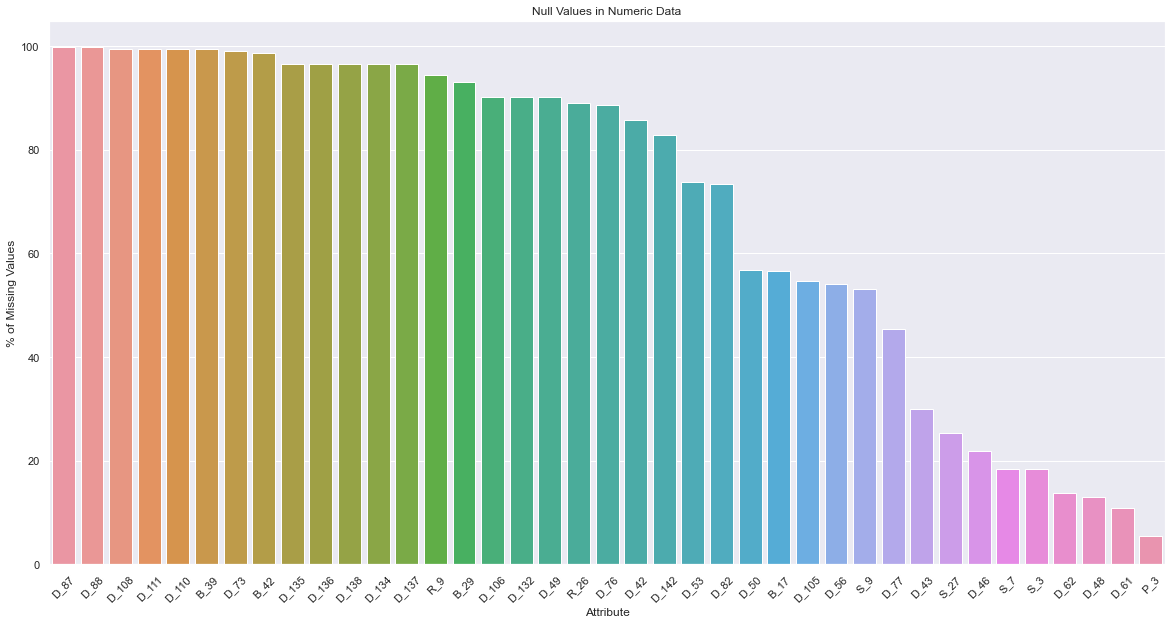

In [45]:
#nulss above limit
pctNulls = 5
numericNulls = numericNulls[numericNulls > pctNulls]

#To DF
numericNullsDf = numericNulls.to_frame(name = 'numericNulls')
numericNullsDf = numericNullsDf.sort_values('numericNulls',\
                                            ascending=False)

# figure for missing values
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=numericNullsDf.index,\
                 y=numericNullsDf.numericNulls,\
                 data=numericNullsDf)

ax.set(title='Null Values in Numeric Data')
ax.set(xlabel="Attribute", ylabel='% of Missing Values')

plt.xticks(rotation=45)
plt.show()

In [46]:
print('Number of columns with nulls above ' + \
      str(pctNulls) + '% is -> ' + str(numericNulls.shape[0]))

Number of columns with nulls above 5% is -> 39


In [47]:
#Limit of nulls aceptable
x = 20
numericNullsDf_aboveXpct = numericNullsDf[numericNullsDf > x].dropna()
cols2Drop = numericNullsDf_aboveXpct.index
cols2Drop

Index(['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42',
       'D_135', 'D_136', 'D_138', 'D_134', 'D_137', 'R_9', 'B_29', 'D_106',
       'D_132', 'D_49', 'R_26', 'D_76', 'D_42', 'D_142', 'D_53', 'D_82',
       'D_50', 'B_17', 'D_105', 'D_56', 'S_9', 'D_77', 'D_43', 'S_27', 'D_46'],
      dtype='object')

In [48]:
#Drop variables with to many nulls
train_data_numeric_clean = train_data_numeric.drop(columns= cols2Drop)
train_data_numeric_clean

P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.927437  0.007716  0.002012  0.811036  0.001816  0.145747  0.005826   
1        0.931875  0.009972  0.004723  0.812552  0.004969       NaN  0.008166   
2        0.936455  0.036248  0.028009  0.818884  0.006339       NaN  0.008284   
3        0.925237  0.002328  0.005986  0.818650  0.001289       NaN  0.007104   
4        0.853476  0.000166  0.007858  0.811090  0.004103       NaN  0.009790   
...           ...       ...       ...       ...       ...       ...       ...   
1382857  0.845592  0.008302  0.027152  0.810376  0.000362  0.093131  0.006670   
1382858  0.512331  0.066719  0.258766  0.054134  0.009598  0.141616  0.003534   
1382859  0.972914  0.598166  0.044332  1.004104  0.001686  0.137311  0.006085   
1382860  0.116854  0.622150  0.150316  0.055931  1.003595  0.220425  0.280979   
1382861  0.854199  0.005568  0.118026  0.192643  0.009583  0.147021  0.000779   

              B_3      D_44       B_4  ...     D_130     D_131     D_133  \
0        0.005554  0.007046  0.003595  ...  0.008312  0.009348  0.009336   
1        0.000992  0.006304  0.004767  ...  0.004321  0.004523  0.000205   
2        0.005814  0.000072  0.001716  ...  0.009662  0.007592  0.005379   
3        0.008613  0.009497  0.001131  ...  0.006505  0.009659  0.004786   
4        0.003384  0.007952  0.002677  ...  0.006998  0.000802  0.008492   
...           ...       ...       ...  ...       ...       ...       ...   
1382857  0.003630       NaN  0.022773  ...  0.005133  0.007144  0.005419   
1382858  0.329521  0.375819  0.641524  ...  1.000931  0.007631  0.008373   
1382859  0.004180  0.008611  0.081884  ...  0.002539  0.003318  0.005751   
1382860  0.236893  0.002689  0.069254  ...  0.003857  0.009134  0.008296   
1382861  0.112364  0.003135  0.308120  ...  1.000314  0.000215  0.003586   

             R_28     D_139     D_140     D_141     D_143     D_144     D_145  
0        0.009804  0.003616  0.006932  0.008604  0.003723  0.008369  0.007014  
1        0.004224  0.001690  0.006082  0.009000  0.002809  0.002951  0.006065  
2        0.000345  0.007555  0.006555  0.002374  0.003539  0.002715  0.000628  
3        0.006044  0.008696  0.009739  0.008215  0.001343  0.008787  0.006253  
4        0.009327  0.003995  0.003113  0.009419  0.009438  0.000763  0.003817  
...           ...       ...       ...       ...       ...       ...       ...  
1382857  0.004626  0.007781  0.000709  0.002118  0.003699  0.000433  0.005024  
1382858  0.009802  0.003375  0.002814  0.004659  0.009982  0.004349  0.007805  
1382859  0.003204  0.005686  0.007714  0.005633  0.000416  0.002774  0.000848  
1382860  0.001512  1.004266  0.006791  0.861576  1.009716  0.008985  0.100165  
1382861  0.004532  0.006483  0.007806  0.005027  0.007957  0.004437  0.003831  

[1382862 rows x 144 columns]

In [49]:
#Correlation Matrix
corr = train_data_numeric_clean.corr().abs()

In [50]:
#Top Correlations
topCorr = corr.unstack().sort_values(ascending=False)

topCorrDF = topCorr.to_frame()
topCorrDF.reset_index(inplace=True)
topCorrDF['Keep'] = topCorrDF['level_0'] != topCorrDF['level_1'] 
topCorrDF = topCorrDF[topCorrDF['Keep']]
topCorrDF

level_0 level_1         0  Keep
144     D_104   D_103  0.999750  True
145     D_103   D_104  0.999750  True
146     D_139   D_143  0.999503  True
147     D_143   D_139  0.999503  True
148     D_141   D_139  0.998176  True
...       ...     ...       ...   ...
20731    B_40    B_15  0.000005  True
20732    R_18    S_26  0.000003  True
20733    S_26    R_18  0.000003  True
20734    B_10    R_25  0.000002  True
20735    R_25    B_10  0.000002  True

[20592 rows x 4 columns]

In [51]:
#High Corrlated values
topCorrDFHC = topCorrDF[topCorrDF[0] > 0.85]
topCorrDFHC

level_0 level_1         0  Keep
144   D_104   D_103  0.999750  True
145   D_103   D_104  0.999750  True
146   D_139   D_143  0.999503  True
147   D_143   D_139  0.999503  True
148   D_141   D_139  0.998176  True
149   D_139   D_141  0.998176  True
150   D_143   D_141  0.997699  True
151   D_141   D_143  0.997699  True
152     B_1    B_11  0.995150  True
153    B_11     B_1  0.995150  True
154    B_23     B_7  0.995011  True
155     B_7    B_23  0.995011  True
156   D_119   D_118  0.994949  True
157   D_118   D_119  0.994949  True
158    B_37     B_1  0.992785  True
159     B_1    B_37  0.992785  True
160    D_74    D_75  0.987611  True
161    D_75    D_74  0.987611  True
162    B_37    B_11  0.987393  True
163    B_11    B_37  0.987393  True
164    S_22    S_24  0.948922  True
165    S_24    S_22  0.948922  True
166    D_58    D_75  0.926230  True
167    D_75    D_58  0.926230  True
168    D_58    D_74  0.923020  True
169    D_74    D_58  0.923020  True
170    B_33     B_2  0.913314  True
171     B_2    B_33  0.913314  True
172    B_15    B_14  0.913225  True
173    B_14    B_15  0.913225  True
174     S_7     S_3  0.904614  True
175     S_3     S_7  0.904614  True
176    B_20    B_16  0.888259  True
177    B_16    B_20  0.888259  True
178   D_131    D_79  0.873696  True
179    D_79   D_131  0.873696  True
180    D_48    D_55  0.861778  True
181    D_55    D_48  0.861778  True
182    B_18    B_33  0.853304  True
183    B_33    B_18  0.853304  True

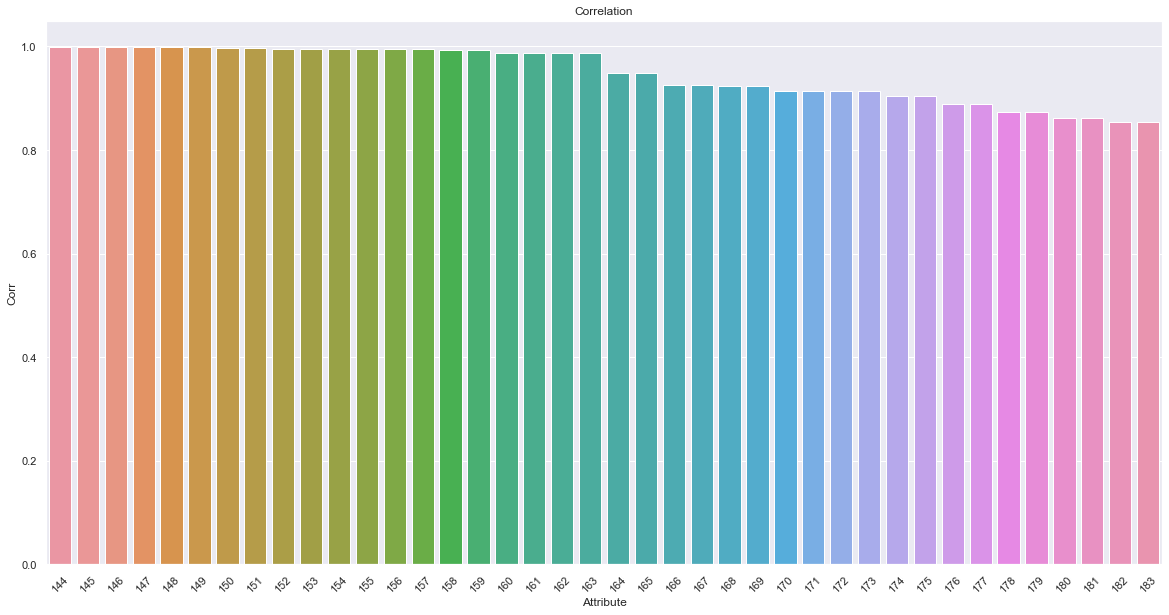

In [52]:
# figure for corrlations
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=topCorrDFHC.index,\
                 y=topCorrDFHC[0],\
                 data=topCorrDFHC)

ax.set(title='Correlation')
ax.set(xlabel="Attribute", ylabel='Corr')

plt.xticks(rotation=45)
plt.show()

In [53]:
import numpy as np
#Column to identify which attributes to remove
topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))
topCorrDFHC

/var/folders/06/rkc92dl925n9zc06g826mq2m0000gn/T/ipykernel_87600/2616978870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))


level_0 level_1         0  Keep  Running
144   D_104   D_103  0.999750  True        0
145   D_103   D_104  0.999750  True        1
146   D_139   D_143  0.999503  True        2
147   D_143   D_139  0.999503  True        3
148   D_141   D_139  0.998176  True        4
149   D_139   D_141  0.998176  True        5
150   D_143   D_141  0.997699  True        6
151   D_141   D_143  0.997699  True        7
152     B_1    B_11  0.995150  True        8
153    B_11     B_1  0.995150  True        9
154    B_23     B_7  0.995011  True       10
155     B_7    B_23  0.995011  True       11
156   D_119   D_118  0.994949  True       12
157   D_118   D_119  0.994949  True       13
158    B_37     B_1  0.992785  True       14
159     B_1    B_37  0.992785  True       15
160    D_74    D_75  0.987611  True       16
161    D_75    D_74  0.987611  True       17
162    B_37    B_11  0.987393  True       18
163    B_11    B_37  0.987393  True       19
164    S_22    S_24  0.948922  True       20
165    S_24    S_22  0.948922  True       21
166    D_58    D_75  0.926230  True       22
167    D_75    D_58  0.926230  True       23
168    D_58    D_74  0.923020  True       24
169    D_74    D_58  0.923020  True       25
170    B_33     B_2  0.913314  True       26
171     B_2    B_33  0.913314  True       27
172    B_15    B_14  0.913225  True       28
173    B_14    B_15  0.913225  True       29
174     S_7     S_3  0.904614  True       30
175     S_3     S_7  0.904614  True       31
176    B_20    B_16  0.888259  True       32
177    B_16    B_20  0.888259  True       33
178   D_131    D_79  0.873696  True       34
179    D_79   D_131  0.873696  True       35
180    D_48    D_55  0.861778  True       36
181    D_55    D_48  0.861778  True       37
182    B_18    B_33  0.853304  True       38
183    B_33    B_18  0.853304  True       39

In [54]:
#Remove pair for high correaltions
topCorrDFHC = topCorrDFHC[topCorrDFHC.index%2==0]
topCorrDFHC

level_0 level_1         0  Keep  Running
144   D_104   D_103  0.999750  True        0
146   D_139   D_143  0.999503  True        2
148   D_141   D_139  0.998176  True        4
150   D_143   D_141  0.997699  True        6
152     B_1    B_11  0.995150  True        8
154    B_23     B_7  0.995011  True       10
156   D_119   D_118  0.994949  True       12
158    B_37     B_1  0.992785  True       14
160    D_74    D_75  0.987611  True       16
162    B_37    B_11  0.987393  True       18
164    S_22    S_24  0.948922  True       20
166    D_58    D_75  0.926230  True       22
168    D_58    D_74  0.923020  True       24
170    B_33     B_2  0.913314  True       26
172    B_15    B_14  0.913225  True       28
174     S_7     S_3  0.904614  True       30
176    B_20    B_16  0.888259  True       32
178   D_131    D_79  0.873696  True       34
180    D_48    D_55  0.861778  True       36
182    B_18    B_33  0.853304  True       38

In [55]:
#Drop variables with high correlation 
train_data_numeric_clean_HC = \
train_data_numeric_clean.drop(columns= topCorrDFHC.level_0)
train_data_numeric_clean_HC

P_2      D_39       B_2       R_1       S_3      D_41       B_3  \
0        0.927437  0.007716  0.811036  0.001816  0.145747  0.005826  0.005554   
1        0.931875  0.009972  0.812552  0.004969       NaN  0.008166  0.000992   
2        0.936455  0.036248  0.818884  0.006339       NaN  0.008284  0.005814   
3        0.925237  0.002328  0.818650  0.001289       NaN  0.007104  0.008613   
4        0.853476  0.000166  0.811090  0.004103       NaN  0.009790  0.003384   
...           ...       ...       ...       ...       ...       ...       ...   
1382857  0.845592  0.008302  0.810376  0.000362  0.093131  0.006670  0.003630   
1382858  0.512331  0.066719  0.054134  0.009598  0.141616  0.003534  0.329521   
1382859  0.972914  0.598166  1.004104  0.001686  0.137311  0.006085  0.004180   
1382860  0.116854  0.622150  0.055931  1.003595  0.220425  0.280979  0.236893   
1382861  0.854199  0.005568  0.192643  0.009583  0.147021  0.000779  0.112364   

             D_44       B_4      D_45  ...     D_127     D_128     D_129  \
0        0.007046  0.003595  0.348216  ...  0.005891  0.999197  0.003513   
1        0.006304  0.004767  0.332139  ...  0.004523  1.004878  0.003063   
2        0.000072  0.001716  0.324494  ...  0.001921  1.007721  0.006351   
3        0.009497  0.001131  0.331189  ...  0.000439  1.004477  0.007785   
4        0.007952  0.002677  0.324480  ...  0.000594  1.004422  0.007107   
...           ...       ...       ...  ...       ...       ...       ...   
1382857       NaN  0.022773  0.368010  ...  0.009727  1.007972  0.005755   
1382858  0.375819  0.641524  0.435235  ...  0.000268  0.003284  0.009343   
1382859  0.008611  0.081884  0.360534  ...  1.000708  1.008807  1.001783   
1382860  0.002689  0.069254  0.040806  ...  0.009075  1.003412  0.001548   
1382861  0.003135  0.308120  0.305994  ...  0.007575  1.006196  1.003388   

             B_41     D_130     D_133      R_28     D_140     D_144     D_145  
0        0.000191  0.008312  0.009336  0.009804  0.006932  0.008369  0.007014  
1        0.005348  0.004321  0.000205  0.004224  0.006082  0.002951  0.006065  
2        0.007839  0.009662  0.005379  0.000345  0.006555  0.002715  0.000628  
3        0.003993  0.006505  0.004786  0.006044  0.009739  0.008787  0.006253  
4        0.001722  0.006998  0.008492  0.009327  0.003113  0.000763  0.003817  
...           ...       ...       ...       ...       ...       ...       ...  
1382857  0.001860  0.005133  0.005419  0.004626  0.000709  0.000433  0.005024  
1382858  0.004794  1.000931  0.008373  0.009802  0.002814  0.004349  0.007805  
1382859  0.000180  0.002539  0.005751  0.003204  0.007714  0.002774  0.000848  
1382860  0.005271  0.003857  0.008296  0.001512  0.006791  0.008985  0.100165  
1382861  0.008232  1.000314  0.003586  0.004532  0.007806  0.004437  0.003831  

[1382862 rows x 126 columns]

In [56]:
Delinquency = train_data_numeric_clean_HC.filter(regex='D')
Delinquency.head()

D_39      D_41      D_44      D_45      D_47      D_51      D_52  \
0  0.007716  0.005826  0.007046  0.348216  0.437152  0.338425  0.085716   
1  0.009972  0.008166  0.006304  0.332139  0.414193  0.338711  0.067642   
2  0.036248  0.008284  0.000072  0.324494  0.412530  0.674811  0.069150   
3  0.002328  0.007104  0.009497  0.331189  0.419392  0.333561  0.072370   
4  0.000166  0.009790  0.007952  0.324480  0.414314  0.007849  0.076771   

       D_54      D_55      D_59  ...     D_124     D_125     D_127     D_128  \
0  1.005512  0.084903  0.190308  ...  0.417637  0.005207  0.005891  0.999197   
1  1.001352  0.076574  0.197170  ...  0.411424  0.004669  0.004523  1.004878   
2  1.001763  0.041513  0.191624  ...  0.416215  0.008313  0.001921  1.007721   
3  1.006742  0.076164  0.196232  ...  0.417629  0.008866  0.000439  1.004477   
4  1.002273  0.044080  0.212465  ...  0.414663  0.003300  0.000594  1.004422   

      D_129     D_130     D_133     D_140     D_144     D_145  
0  0.003513  0.008312  0.009336  0.006932  0.008369  0.007014  
1  0.003063  0.004321  0.000205  0.006082  0.002951  0.006065  
2  0.006351  0.009662  0.005379  0.006555  0.002715  0.000628  
3  0.007785  0.006505  0.004786  0.009739  0.008787  0.006253  
4  0.007107  0.006998  0.008492  0.003113  0.000763  0.003817  

[5 rows x 53 columns]

In [57]:
Risk = train_data_numeric_clean_HC.filter(regex='R')
Risk.head()

R_1       R_2       R_3       R_4       R_5       R_6       R_7  \
0  0.001816  0.005267  0.000566  0.003863  0.003794  0.005836  0.001745   
1  0.004969  0.007144  0.006327  0.006690  0.001448  0.008679  0.000844   
2  0.006339  0.005210  0.005189  0.005847  0.005555  0.002762  0.007501   
3  0.001289  0.000881  0.009568  0.007400  0.000563  0.001345  0.001551   
4  0.004103  0.001229  0.004567  0.001142  0.008566  0.005811  0.007596   

        R_8      R_10      R_11  ...      R_18      R_19      R_20      R_21  \
0  0.007641  0.003388  0.003193  ...  0.008905  0.007869  0.000512  0.009444   
1  0.007513  0.007760  0.002804  ...  0.002470  0.001594  0.004812  0.009102   
2  0.008590  0.008538  0.005557  ...  0.004027  0.000699  0.005103  0.001572   
3  0.004509  0.005019  0.003071  ...  0.005800  0.009467  0.009737  0.000186   
4  0.000561  0.009778  0.009828  ...  0.007027  0.007410  0.006567  0.008661   

       R_22      R_23      R_24      R_25      R_27      R_28  
0  0.004845  0.003680  0.004030  0.007216  1.003566  0.009804  
1  0.001306  0.004127  0.000649  0.000610  1.004596  0.004224  
2  0.001301  0.002380  0.004914  0.003509  1.003659  0.000345  
3  0.003067  0.004646  0.001667  0.002449  1.006008  0.006044  
4  0.001624  0.009825  0.003906  0.008204  1.003585  0.009327  

[5 rows x 26 columns]

In [58]:
Spend = train_data_numeric_clean_HC.filter(regex='S')
Spend.head()

S_3       S_5       S_6       S_8      S_11      S_12      S_13  \
0  0.145747  0.003528  0.005266  0.007254  0.283605  0.184960  0.006857   
1       NaN  0.000460  1.004810  0.008651  0.283105  0.193651  0.006956   
2       NaN  0.004163  1.002047  0.001198  0.280177  0.187360  0.006521   
3       NaN  0.000023  1.000946  0.001126  0.281328  0.190375  0.008087   
4       NaN  0.000231  1.004210  0.006380  0.289012  0.187626  0.003540   

       S_15      S_16      S_17      S_18      S_19      S_20      S_23  \
0  0.500016  0.001128  0.008803  0.008414  0.003294  0.001176  0.135217   
1  0.507256  0.007411  0.003645  0.009632  0.000978  0.009187  0.138668   
2  0.500443  0.007053  0.000816  0.004506  0.007588  0.005576  0.131437   
3  0.503831  0.004857  0.002596  0.001758  0.001603  0.000187  0.136478   
4  0.507549  0.003510  0.004459  0.006631  0.007878  0.007313  0.132373   

       S_24      S_25      S_26  
0  0.085993  0.972734  0.131747  
1  0.080681  0.973617  0.003286  
2  0.078178  0.972992  0.006164  
3  0.077141  0.977601  0.006570  
4  0.081172  0.974066  0.001461

In [59]:
Payment = train_data_numeric_clean_HC.filter(regex='P')
Payment.head()

P_2       P_3       P_4
0  0.927437  0.614372  0.009294
1  0.931875  0.661083  0.006046
2  0.936455  0.642370  0.006453
3  0.925237  0.605320  0.005708
4  0.853476  0.320957  0.004725

In [60]:
Balance = train_data_numeric_clean_HC.filter(regex='B')
Balance.head()

B_2       B_3       B_4       B_5       B_6       B_7       B_8  \
0  0.811036  0.005554  0.003595  0.014009  0.234899  0.004260  0.006726   
1  0.812552  0.000992  0.004767  0.019218  1.606071  0.003096  0.003430   
2  0.818884  0.005814  0.001716  0.006214  1.498918  0.025083  0.003865   
3  0.818650  0.008613  0.001131  0.001992  1.101752  0.007718  0.003073   
4  0.811090  0.003384  0.002677  0.008312  1.512151  0.007893  0.008659   

        B_9      B_10      B_11  ...      B_24      B_25      B_26      B_27  \
0  0.002579  0.300766  0.009206  ...  0.003467  0.001469  0.002674  0.004865   
1  0.000535  0.242152  0.002702  ...  0.008110  0.000928  0.002376  0.002007   
2  0.012890  0.245102  0.007328  ...  0.000261  0.013181  0.000249  0.005574   
3  0.000048  0.237745  0.006608  ...  0.008629  0.007850  0.007262  0.000329   
4  0.000022  0.242148  0.009096  ...  0.003916  0.002482  0.007450  0.001761   

       B_28  B_31      B_32      B_36      B_40      B_41  
0  0.005436     1  0.009863  0.007179  0.004068  0.000191  
1  0.006327     1  0.002248  0.001450  0.000967  0.005348  
2  0.005810     1  0.008849  0.003007  0.004868  0.007839  
3  0.004361     1  0.001486  0.002611  0.007164  0.003993  
4  0.008077     1  0.003386  0.004988  0.004885  0.001722  

[5 rows x 27 columns]

In [61]:
Delinquency.describe()

D_39          D_41          D_44          D_45          D_47  \
count  1.382862e+06  1.382343e+06  1.314187e+06  1.382343e+06  1.382862e+06   
mean   1.531865e-01  5.978309e-02  1.183263e-01  2.522715e-01  4.070805e-01   
std    2.700303e-01  2.026389e-01  2.209929e-01  2.424714e-01  2.345539e-01   
min    1.566353e-08  3.440668e-09  5.852338e-09  1.563241e-08 -2.662164e-02   
25%    4.542409e-03  2.876825e-03  3.824994e-03  5.474150e-02  2.323029e-01   
50%    9.068117e-03  5.744923e-03  7.663912e-03  1.812016e-01  3.831662e-01   
75%    2.366801e-01  8.614322e-03  1.319283e-01  3.734026e-01  5.614375e-01   
max    5.362196e+00  8.988807e+00  4.005466e+00  1.602639e+00  1.638956e+00   

               D_51          D_52          D_54          D_55          D_59  \
count  1.382862e+06  1.375332e+06  1.382343e+06  1.336385e+06  1.356345e+06   
mean   1.450472e-01  1.800181e-01  9.846189e-01  2.984100e-01  3.622595e-01   
std    2.423010e-01  1.737084e-01  1.411792e-01  2.888014e-01  1.928901e-01   
min    3.237604e-08 -7.016962e-03 -2.004074e-03  3.427949e-07 -9.476952e-02   
25%    3.646169e-03  7.388487e-02  1.002342e+00  5.715389e-02  2.349013e-01   
50%    7.282906e-03  1.444413e-01  1.004893e+00  1.822235e-01  3.783441e-01   
75%    3.360348e-01  2.330062e-01  1.007452e+00  5.017720e-01  4.678712e-01   
max    2.676518e+00  1.010000e+00  1.010000e+00  2.736358e+00  2.125230e+00   

       ...         D_124         D_125         D_127         D_128  \
count  ...  1.338969e+06  1.338969e+06  1.382862e+06  1.357631e+06   
mean   ...  3.054065e-01  8.434663e-02  1.076544e-01  5.842846e-01   
std    ...  2.258255e-01  2.919139e-01  3.035181e-01  4.931275e-01   
min    ... -4.545360e-02  9.315131e-09  1.006008e-09  1.570215e-08   
25%    ...  1.405653e-01  2.695765e-03  2.788662e-03  5.947510e-03   
50%    ...  2.741785e-01  5.396823e-03  5.572799e-03  1.000426e+00   
75%    ...  4.166230e-01  8.098632e-03  8.355970e-03  1.004737e+00   
max    ...  2.826254e+00  1.000773e+01  1.010000e+00  1.021384e+00   

              D_129         D_130         D_133         D_140         D_144  \
count  1.357631e+06  1.357631e+06  1.372203e+06  1.372721e+06  1.372696e+06   
mean   4.400195e-01  2.013225e-01  4.633224e-02  2.667208e-02  5.233069e-02   
std    4.957618e-01  3.972370e-01  1.726495e-01  1.456421e-01  1.823715e-01   
min    2.234409e-08  3.227763e-09  6.380582e-10  3.725073e-09  1.969412e-08   
25%    4.434334e-03  3.109250e-03  2.719222e-03  2.557001e-03  2.749556e-03   
50%    8.855433e-03  6.222280e-03  5.434812e-03  5.112718e-03  5.498853e-03   
75%    1.004247e+00  9.329784e-03  8.163627e-03  7.663891e-03  8.257057e-03   
max    1.010000e+00  1.023141e+00  1.509998e+00  1.010000e+00  1.343329e+00   

              D_145  
count  1.357631e+06  
mean   6.257268e-02  
std    1.942993e-01  
min    3.798210e-09  
25%    3.025997e-03  
50%    6.049355e-03  
75%    9.083035e-03  
max    4.827630e+00  

[8 rows x 53 columns]

# Clean up bellow, do not need to run for now

In [39]:
N = 20
# Select first N columns
first_n_column_Deli  = Delinquency.iloc[: , 1:N]

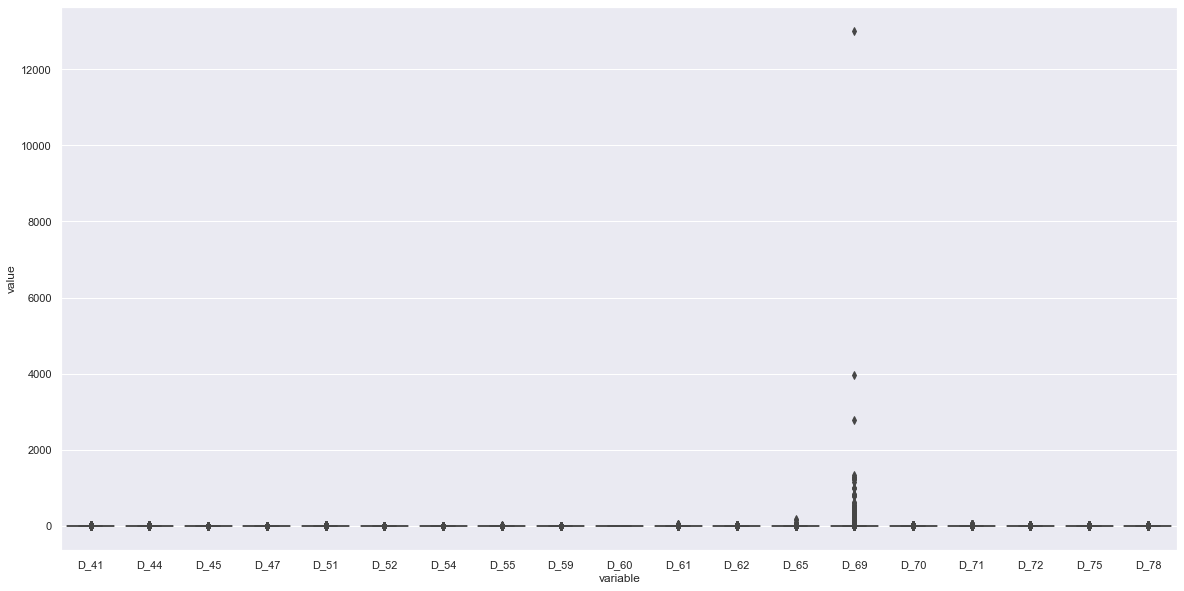

In [40]:
#Boxplot of Delinquency first columns
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(first_n_column_Deli))

plt.show()

In [41]:
#Function to remove outliers, requiere DF and attribute 
def remove_ouliers(df,attribute):
    
    #Calculate IQR
    q1 = df[attribute].quantile(0.25)
    q3 = df[attribute].quantile(0.75)
    iqr = q3 - q1
    
    #remove outliers
    df = df.loc[(df[attribute] < 1.5 * iqr + q3) & (df[attribute] > q1 - 1.5 * iqr)]
    #sort_values(by=attribute,ascending=False)
    
    return df            

In [56]:
#for cols in first_n_column_Deli.columns:
    #remove_ouliers(first_n_column_Deli,cols)

D_41
D_44
D_45
D_47
D_51
D_52
D_54
D_55
D_59
D_60
D_65
D_68
D_69
D_70
D_71
D_72
D_78
D_80
D_81


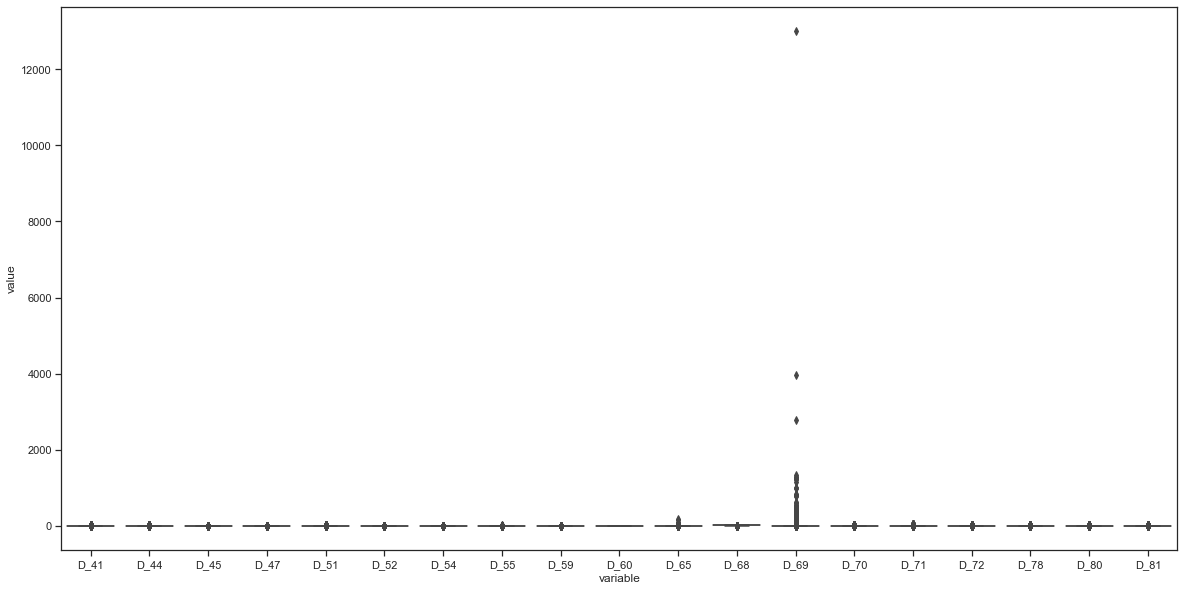

In [57]:
#Boxplot of Delinquency first columns
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(first_n_column_Deli))

plt.show()

KeyboardInterrupt: 

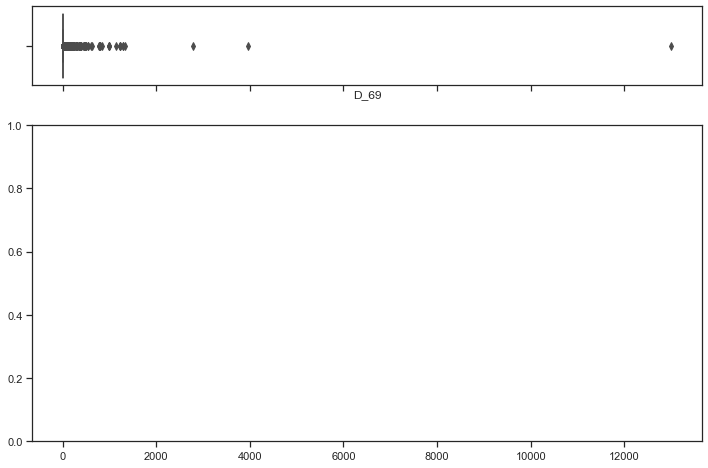

In [41]:
#Histo-Box

sns.set(style="ticks")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

sns.boxplot(x= first_n_column_Deli['D_69'], ax=ax_box)
sns.histplot(x = first_n_column_Deli['D_69'], ax=ax_hist, kde=True)


ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

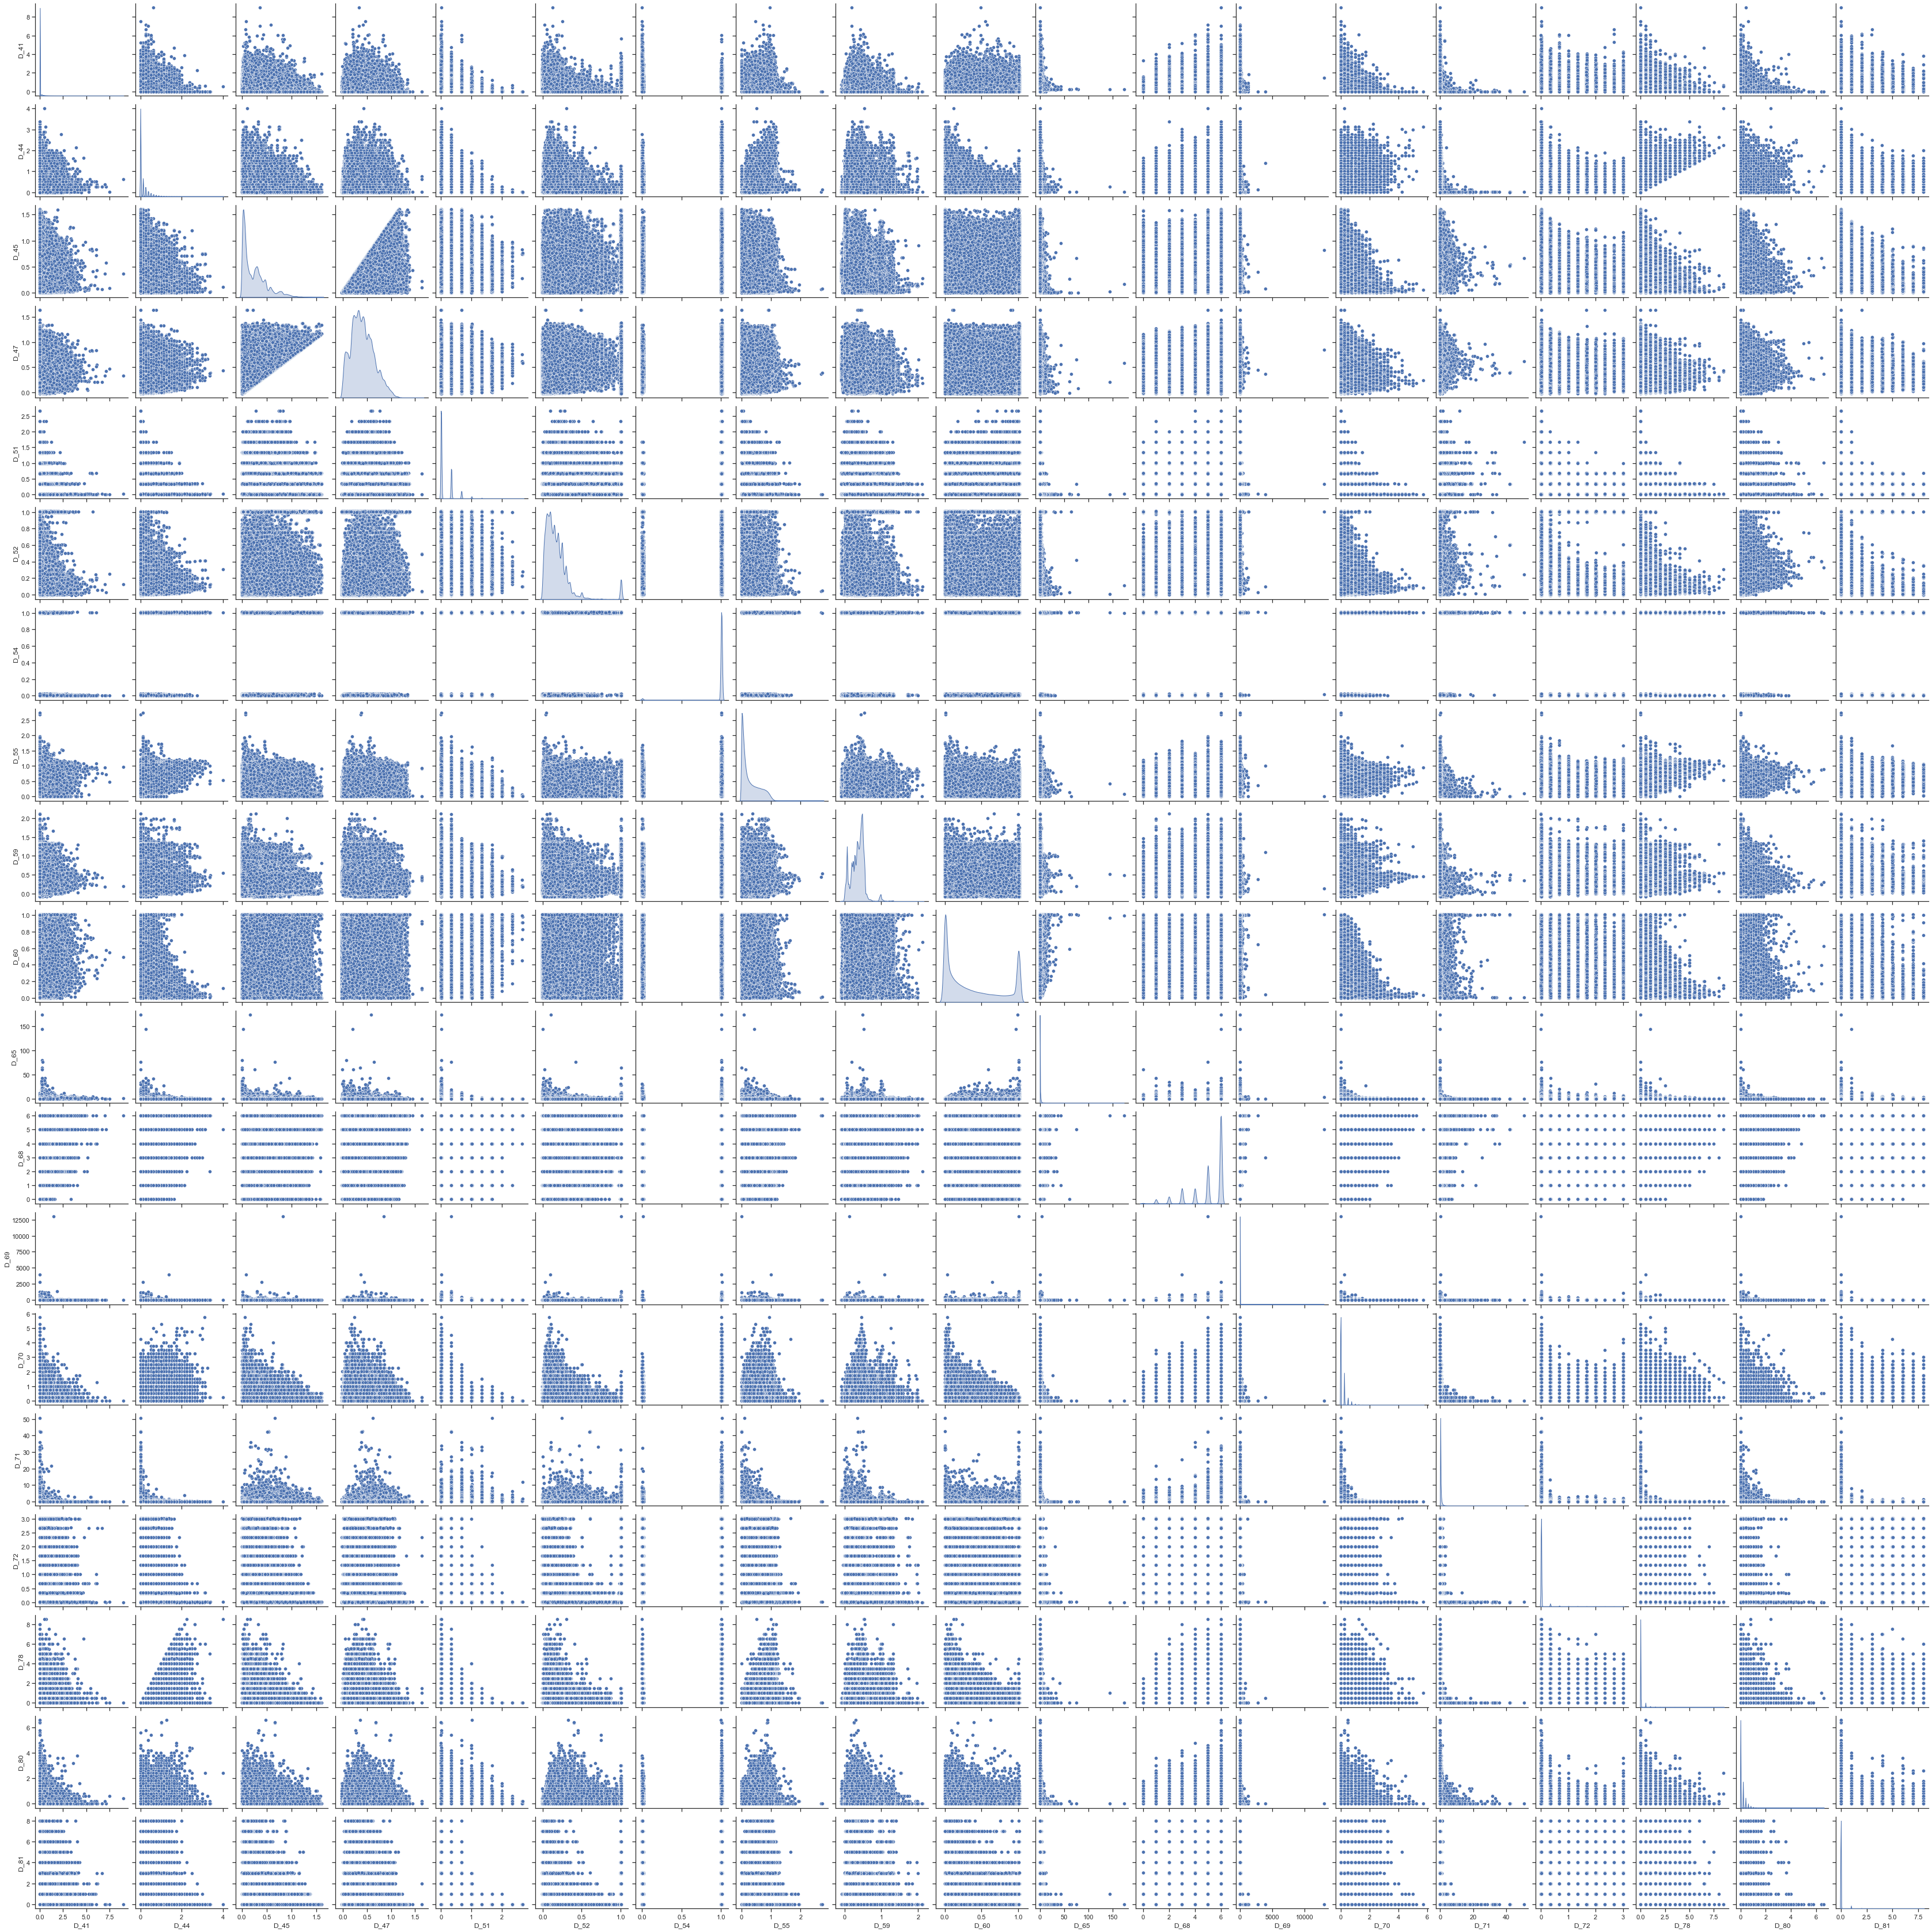

In [53]:
# Create the pairplot for numeric values
#sns.pairplot(first_n_column, diag_kind = 'kde')

KeyboardInterrupt: 

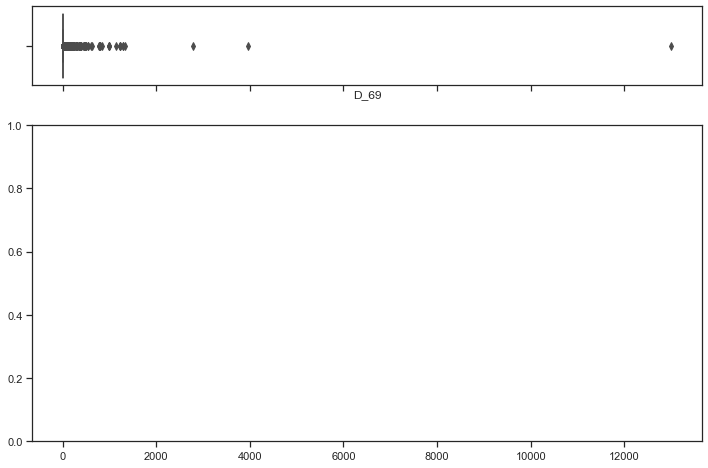

In [58]:
#Histo-Box

sns.set(style="ticks")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

sns.boxplot(x= first_n_column['D_69'], ax=ax_box)
sns.histplot(x = first_n_column['D_69'], ax=ax_hist, kde=True)


ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [34]:
#Variable list
variableList = first_n_column.columns

#Loop through variables to remove outliers
for attribute in variableList:
    first_n_column_NoOutlier = remove_ouliers(first_n_column,attribute)

P_2
D_39
B_1
R_1
D_41
B_3
D_44
B_4
D_45


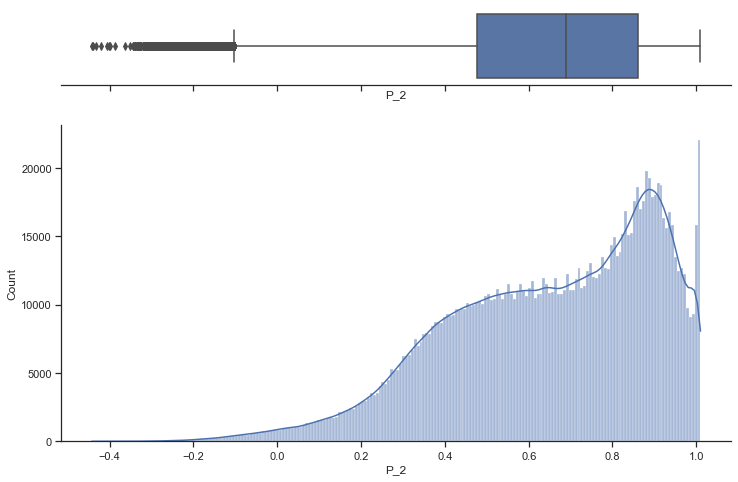

In [35]:
#Histo-Box

sns.set(style="ticks")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

sns.boxplot(x= first_n_column_NoOutlier['P_2'], ax=ax_box)
sns.histplot(x = first_n_column_NoOutlier['P_2'], ax=ax_hist, kde=True)


ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [36]:
first_n_column_NoOutlier

P_2      D_39       B_1       R_1      D_41       B_3      D_44  \
669101   0.907643  0.004976  0.009212  0.009777  0.009594  0.003981  0.004094   
78630    0.987793  0.534378  0.046457  0.000197  0.002459  0.169990  0.003560   
420009   0.651594  0.067564  0.034673  0.004642  0.003863  0.177708  0.252075   
986062   0.892812  0.001219 -0.032170  0.003317  0.003623  0.003720  0.002534   
358587   0.745362  0.003971  0.009977  0.002454  0.001812  0.004787  0.127608   
...           ...       ...       ...       ...       ...       ...       ...   
1349569  0.374117  0.009298  0.109409  0.005891  0.009695  0.001554  0.503298   
1292096  0.496454  0.008065  0.040592  0.007197  0.000523  0.005102  0.127815   
153428   0.549343  0.002896  0.221011  0.003926  0.003984  0.007734  0.005105   
313783        NaN  0.003608  0.249790  0.005098  0.004452  0.003908       NaN   
804339   0.408943  0.008239  0.656741  0.259704  0.000816  0.005035  0.131395   

              B_4          D_45  
669101   0.017549  8.513853e-01  
78630    0.017158  8.513811e-01  
420009   0.625244  8.513803e-01  
986062   0.004564  8.513737e-01  
358587   0.388982  8.513729e-01  
...           ...           ...  
1349569  0.981748  2.255967e-06  
1292096  0.001609  2.138570e-06  
153428   0.277757  9.762083e-07  
313783   0.128728  9.020295e-07  
804339   0.116716  1.563241e-08  

[1341386 rows x 9 columns]

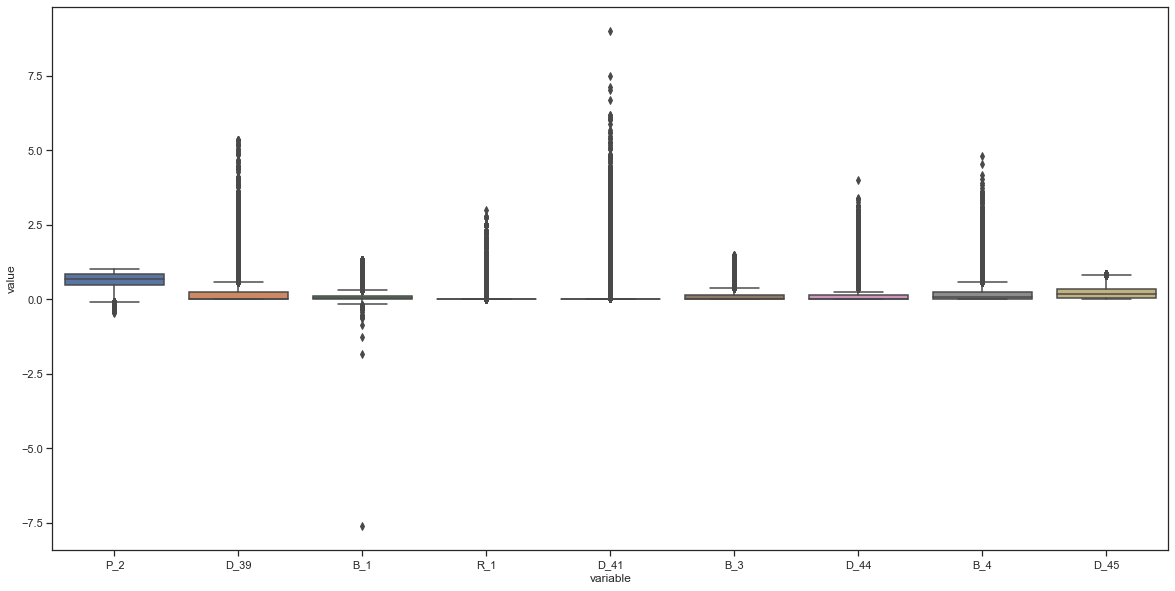

In [38]:
#Boxplot of attributes
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(first_n_column_NoOutlier))

plt.show()

In [39]:
#Normalizing/standardizing/scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
first_n_column[first_n_column.columns]= \
scaler.fit_transform(first_n_column[first_n_column.columns])
first_n_column

P_2      D_39       B_1       R_1      D_41       B_3      D_44  \
0        0.943167  0.001439  0.851670  0.000605  0.000648  0.003691  0.001759   
1        0.781723  0.001352  0.852354  0.000432  0.000915  0.017141  0.001801   
2        0.828367  0.001336  0.851837  0.002894  0.000464  0.004648       NaN   
3        0.677282  0.001284  0.917871  0.001911  0.001017  0.536260  0.031354   
4        0.558531  0.005872  0.902300  0.000776  0.000248  0.571812  0.062481   
...           ...       ...       ...       ...       ...       ...       ...   
1382857  0.722502  0.072998  0.855820  0.002731  0.000814  0.004819  0.000437   
1382858  0.907598  0.000346  0.854884  0.000543  0.000375  0.002038  0.000613   
1382859  0.914532  0.000669  0.852354  0.002030  0.001057  0.002090  0.001582   
1382860  0.837270  0.110833  0.874838  0.002687  0.000196  0.123846  0.000092   
1382861  0.754426  0.001275  0.851906  0.001074  0.000810  0.004379  0.064769   

              B_4      D_45  
0        0.000749  0.217277  
1        0.001105  0.008738  
2        0.000238  0.193094  
3        0.224533  0.311934  
4        0.097259  0.060081  
...           ...       ...  
1382857  0.024977  0.022748  
1382858  0.009209  0.360279  
1382859  0.008856  0.543920  
1382860  0.038242  0.184181  
1382861  0.027360  0.057691  

[1382862 rows x 9 columns]

## Logistic Reegresion

In [62]:
#Delcare X Variables
X = train_data_numeric_clean_HC
X = sm.add_constant(X)
X.head()

const       P_2      D_39       B_2       R_1       S_3      D_41  \
0    1.0  0.927437  0.007716  0.811036  0.001816  0.145747  0.005826   
1    1.0  0.931875  0.009972  0.812552  0.004969       NaN  0.008166   
2    1.0  0.936455  0.036248  0.818884  0.006339       NaN  0.008284   
3    1.0  0.925237  0.002328  0.818650  0.001289       NaN  0.007104   
4    1.0  0.853476  0.000166  0.811090  0.004103       NaN  0.009790   

        B_3      D_44       B_4  ...     D_127     D_128     D_129      B_41  \
0  0.005554  0.007046  0.003595  ...  0.005891  0.999197  0.003513  0.000191   
1  0.000992  0.006304  0.004767  ...  0.004523  1.004878  0.003063  0.005348   
2  0.005814  0.000072  0.001716  ...  0.001921  1.007721  0.006351  0.007839   
3  0.008613  0.009497  0.001131  ...  0.000439  1.004477  0.007785  0.003993   
4  0.003384  0.007952  0.002677  ...  0.000594  1.004422  0.007107  0.001722   

      D_130     D_133      R_28     D_140     D_144     D_145  
0  0.008312  0.009336  0.009804  0.006932  0.008369  0.007014  
1  0.004321  0.000205  0.004224  0.006082  0.002951  0.006065  
2  0.009662  0.005379  0.000345  0.006555  0.002715  0.000628  
3  0.006505  0.004786  0.006044  0.009739  0.008787  0.006253  
4  0.006998  0.008492  0.009327  0.003113  0.000763  0.003817  

[5 rows x 127 columns]

In [63]:
#Fill Nan with mean
X = X.fillna(X.mean())

In [64]:
y

target
0             0
1             0
2             0
3             0
4             0
...         ...
1382857       0
1382858       0
1382859       0
1382860       1
1382861       0

[1382862 rows x 1 columns]

In [65]:
#Checking percantage of null values in objects
nullVals(y)

target    0.0
dtype: float64

In [ ]:
#Logictic Regression
logreg01 = sm.Logit(y, X).fit()
logreg01.summary2()

Optimization terminated successfully.
         Current function value: 0.287378
         Iterations 8
